In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
import seaborn as sns
import geopandas as gpd
df =        pd.read_csv('datasets/survey_results_public.csv')
schema =    pd.read_csv('datasets/survey_results_schema.csv')
match =     pd.read_csv('datasets/country_cont_match.csv')


In [46]:
num_vars = df[['Salary','Country','Gender', 'EmploymentStatus']]

/tmp/ipykernel_40300/3968799798.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


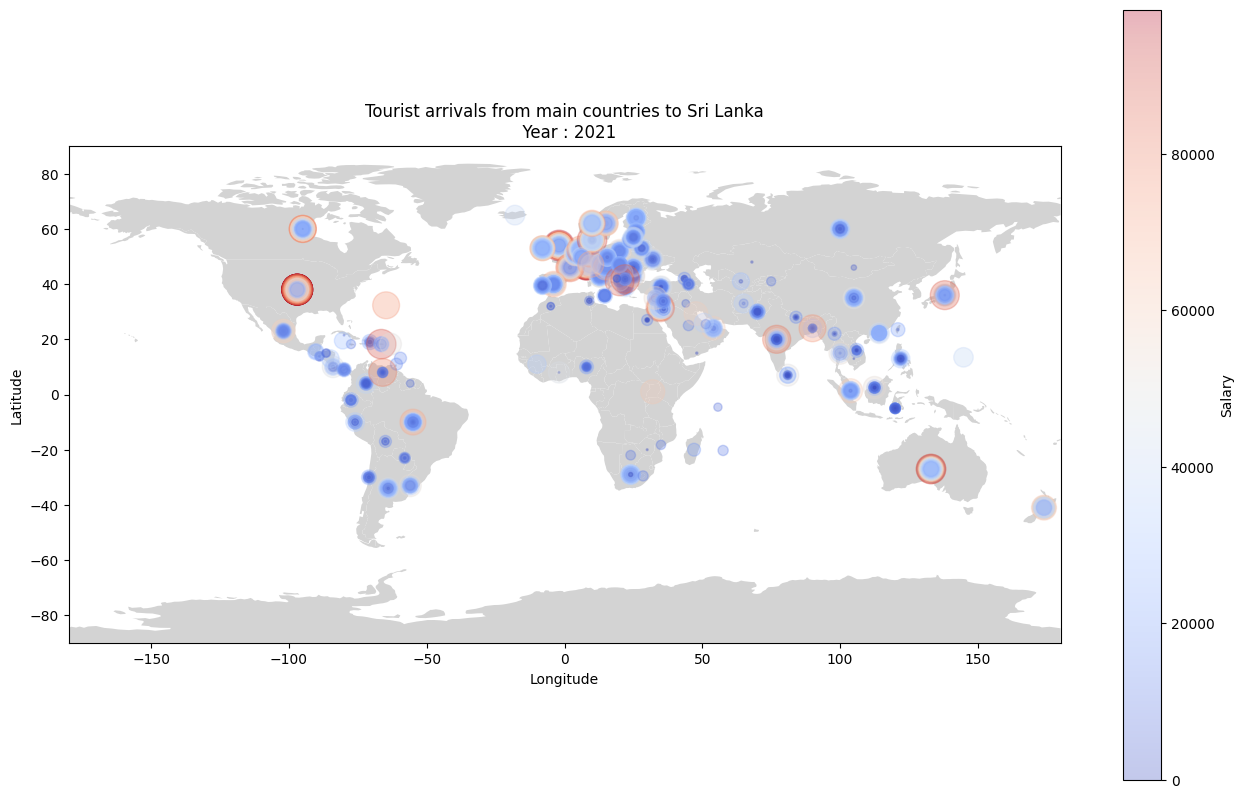

In [47]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
merged_df = pd.merge(num_vars, match, on='Country')
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting tourist source markets
x = merged_df['Longitude']
y = merged_df['Latitude']
z = merged_df['Salary']
plt.scatter(x, y, 
              s=0.0025*z,
              c=0.5*z,
              alpha=0.3,             
              cmap='coolwarm'
            )
plt.colorbar(label='Salary')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title("Tourist arrivals from main countries to Sri Lanka\n  Year : 2021")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

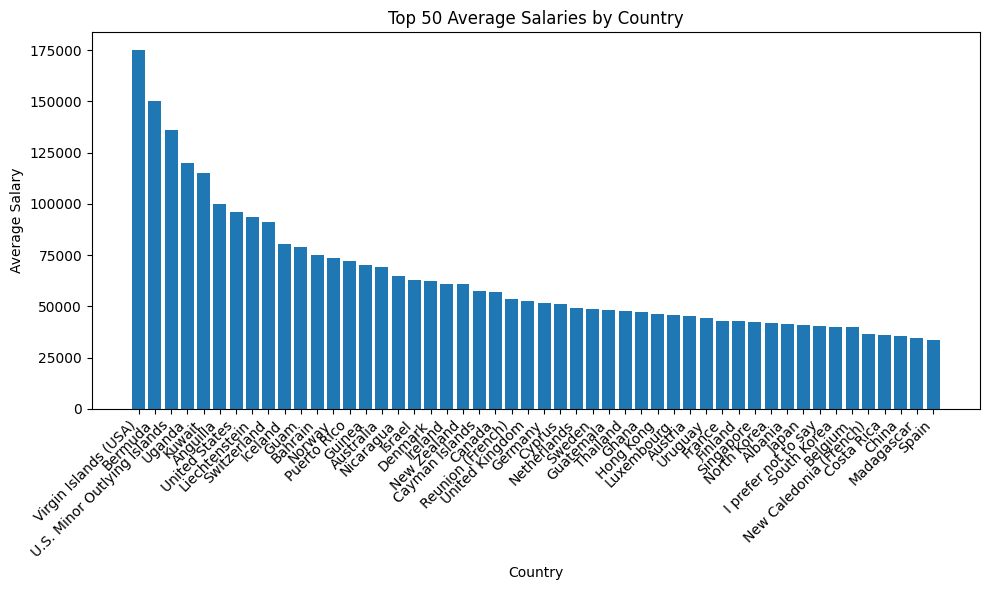

In [48]:
num_vars = df[['Salary','Country','Gender', 'EmploymentStatus']]

# Calculate average salary by country
average_salary_by_country = num_vars.groupby('Country')['Salary'].mean().reset_index()

# Sort by average salary and take the top 20 countries
sorted_top_countries = average_salary_by_country.sort_values(by='Salary', ascending=False).head(50)

plt.figure(figsize=(10, 6))
plt.bar(sorted_top_countries['Country'], sorted_top_countries['Salary'])
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.title('Top 50 Average Salaries by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_40300/768790288.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


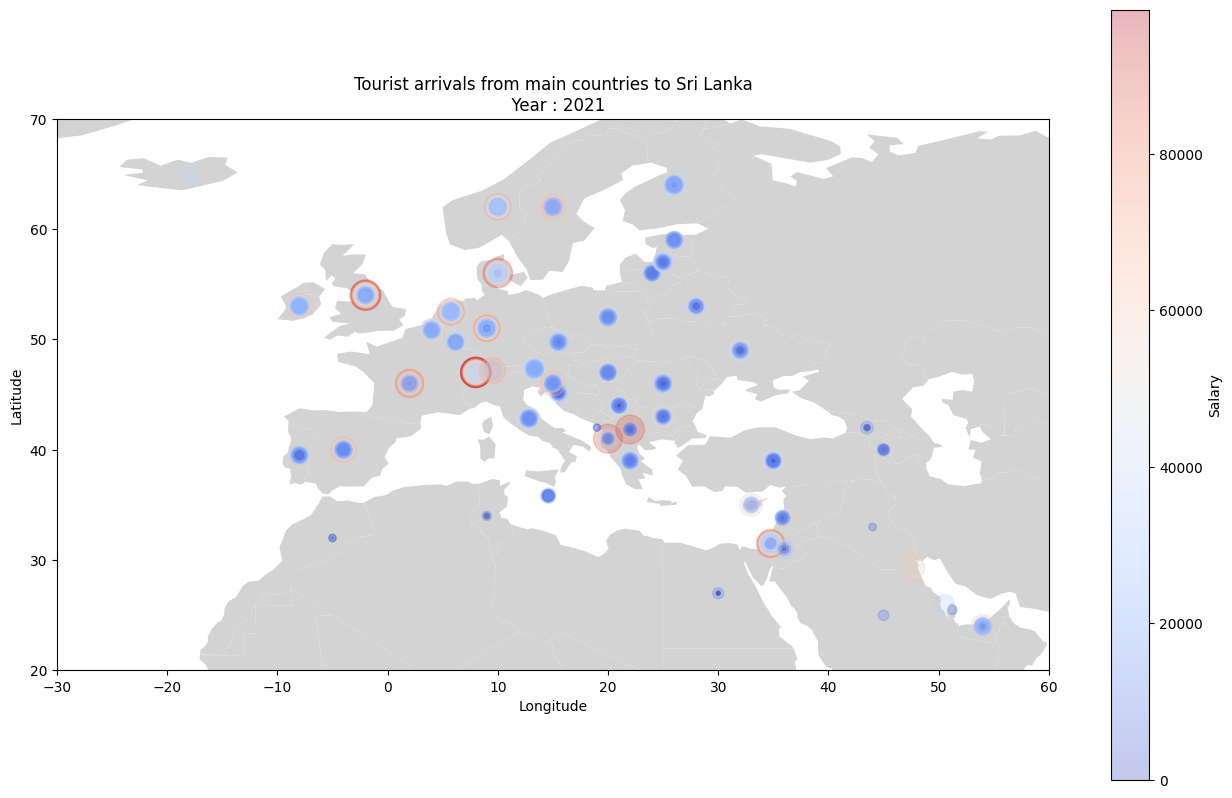

In [49]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
merged_df = pd.merge(num_vars, match, on='Country')
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting tourist source markets
x = merged_df['Longitude']
y = merged_df['Latitude']
z = merged_df['Salary']
plt.scatter(x, y, 
              s=0.0025*z,
              c=0.5*z,
              alpha=0.3,             
              cmap='coolwarm'
            )
plt.colorbar(label='Salary')

# Creating axis limits and title
plt.xlim([-30, 60])
plt.ylim([20, 70])

plt.title("Tourist arrivals from main countries to Sri Lanka\n  Year : 2021")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

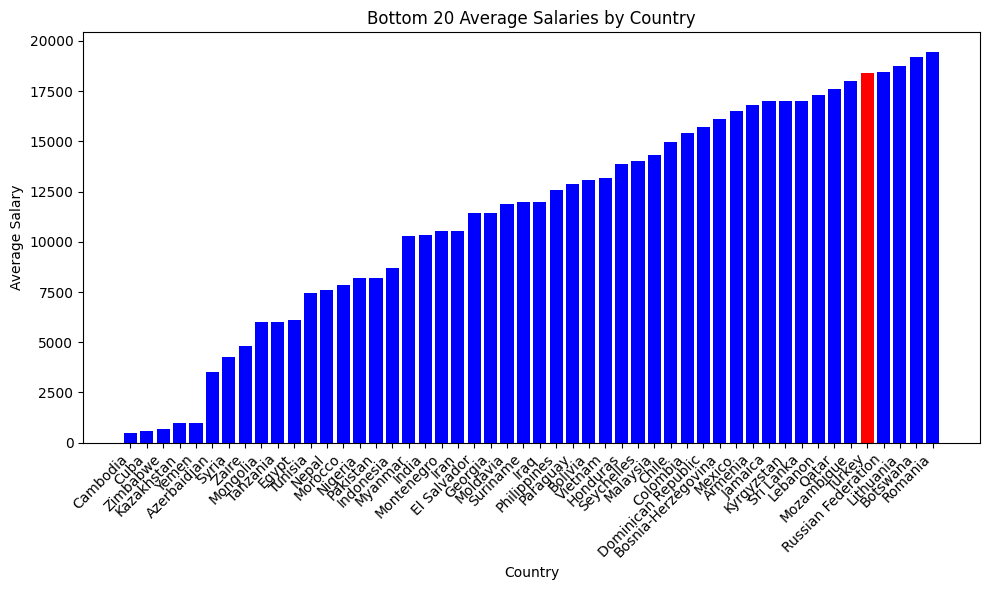

In [57]:
index_to_change = 45  # Change this to the index of the bar you want to change color for

# Set up colors for bars
default_color = 'blue'
highlight_color = 'red'
colors = [highlight_color if i == index_to_change else default_color for i in range(len(sorted_top_countries))]

# Create the bar plot with customized colors
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_top_countries['Country'], sorted_top_countries['Salary'], color=colors)
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.title('Bottom 20 Average Salaries by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
print(num_vars.shape)
def fill_mean(col): return col.fillna(col.mean())  # Ortalama fonksiyonu

# Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=['Salary'], axis=0)
# fill_df = num_vars.apply(fill_mean, axis=0) # Eksik değerleri sütun ortalamalarıyla doldur.

# Test görünümü
drop_sal_df.head()
print(drop_sal_df.shape)
print(drop_sal_df["Gender"].value_counts(dropna=False))

(51392, 4)
(12891, 4)
Gender
Male                                                       10666
NaN                                                         1182
Female                                                       819
Other                                                         49
Male; Other                                                   44
Gender non-conforming                                         43
Male; Gender non-conforming                                   21
Female; Transgender                                           19
Female; Gender non-conforming                                 13
Transgender                                                    8
Male; Female; Transgender; Gender non-conforming; Other        6
Male; Female                                                   5
Transgender; Gender non-conforming                             4
Male; Transgender                                              4
Female; Transgender; Gender non-conforming                   

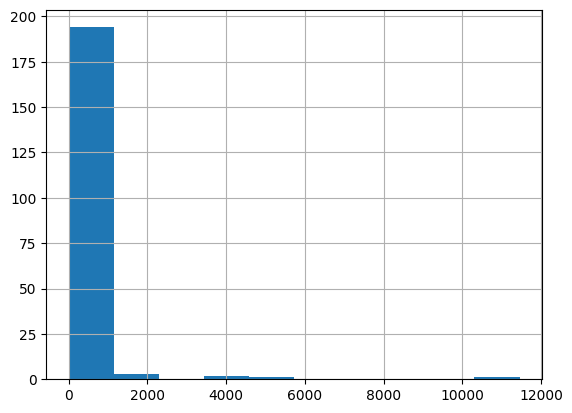

In [52]:
num_vars['Country'].value_counts().hist()
plt.show()